In [ ]:
!pip install detecto

# Imports

In [ ]:
from detecto import core, utils, visualize
from torchvision import transforms
import matplotlib.pyplot as plt
from detecto.visualize import show_labeled_image, plot_prediction_grid
import numpy as np
from fastai.callback.tracker import EarlyStoppingCallback
import os


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data augmentation and load

In [ ]:
custom_transforms = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize(800),
    transforms.ColorJitter(brightness=0.25,hue=0.1, contrast=0.25,saturation=0.25),
    transforms.RandomRotation(degrees=15),
    transforms.RandomHorizontalFlip(p=0.2),
    transforms.ToTensor(),
    utils.normalize_transform(),
])

# Model

In [ ]:
train_dataset = core.Dataset('/content/drive/MyDrive/content/dataset_x8/train', transform = custom_transforms)
test_dataset = core.Dataset('/content/drive/MyDrive/content/dataset_x8/val')
loader = core.DataLoader(train_dataset, batch_size=4, shuffle=True)
model = core.Model(["fox"])

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 135MB/s]


In [ ]:
losses = model.fit(loader, test_dataset, epochs = 8, lr_step_size = 5, learning_rate = 0.01, verbose = True)

Epoch 1 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  7.30it/s]


Loss: 0.07575197033584118
Epoch 2 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:17<00:00,  1.11it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  6.94it/s]


Loss: 0.061847147159278394
Epoch 3 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:16<00:00,  1.22it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  8.42it/s]


Loss: 0.0666660601273179
Epoch 4 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  7.73it/s]


Loss: 0.05762282768264413
Epoch 5 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  8.24it/s]


Loss: 0.05674180779606104
Epoch 6 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:16<00:00,  1.20it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  7.93it/s]


Loss: 0.044428537227213384
Epoch 7 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  8.39it/s]


Loss: 0.04300080053508282
Epoch 8 of 8
Begin iterating over training dataset


100%|██████████| 20/20 [00:17<00:00,  1.17it/s]


Begin iterating over validation dataset


100%|██████████| 20/20 [00:02<00:00,  8.29it/s]


Loss: 0.0464307826012373


# Test

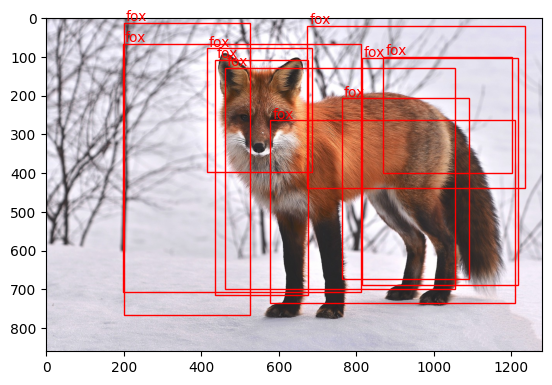

In [ ]:
image = utils.read_image("/content/drive/MyDrive/content/dataset_x8/test.jpg")
predictions = model.predict(image)
labels, boxes, scores = predictions
show_labeled_image(image, boxes, labels)

In [ ]:
print(scores)

tensor([0.9557, 0.8135, 0.5732, 0.2443, 0.1539, 0.1245, 0.0982, 0.0655, 0.0533,
        0.0506])


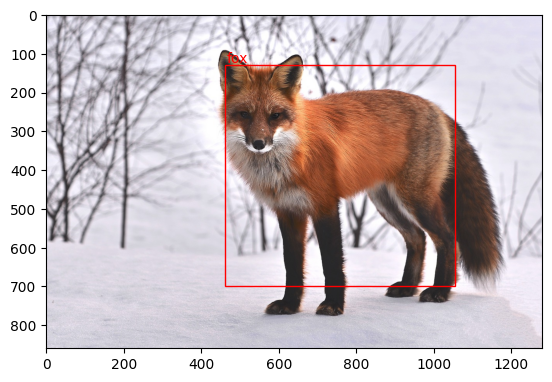

In [ ]:
#thresh = 0.9
filtered_indices = np.where(scores == scores.max())
filtered_scores = scores[filtered_indices]
filtered_boxes = boxes[filtered_indices]
filtered_labels = [labels[i] for i in filtered_indices[0]]

# Wyświetl obraz z wyfiltrowanymi detekcjami
show_labeled_image(image, filtered_boxes, filtered_labels)

# Skan

Python code that will go through all files in the scan folder, select only those with the extension .jpg, .png (ignore the remaining files) and detect objects in the photos. Save information about the detection result as a .txt file (file with the information "Object detected in the photo")

In [ ]:
def skan(path):
  text=[]
  for root, dirs, files in os.walk(path):
    for f in files:
       if f.lower().endswith( '.jpg') or f.lower().endswith( '.png'):
          img = utils.read_image(os.path.join(root, f))
          predictions = model.predict(img)
          labels, boxes, scores = predictions
          filtered_indices = np.where(scores == scores.max())
          filtered_scores = scores[filtered_indices]
          filtered_boxes = boxes[filtered_indices]
          filtered_labels = [labels[i] for i in filtered_indices[0]]
          text.append(f"Wykryto obiekt: {filtered_labels} w pliku: {f} o położeniu: {filtered_boxes}")
          show_labeled_image(img, filtered_boxes, filtered_labels)
  with open('/skan.txt', "w") as file:
    for line in text:
      file.write(line + '\n')

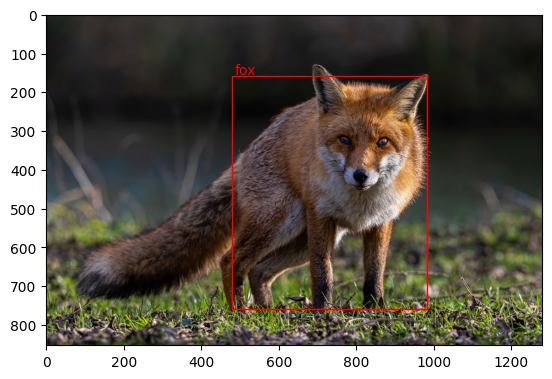

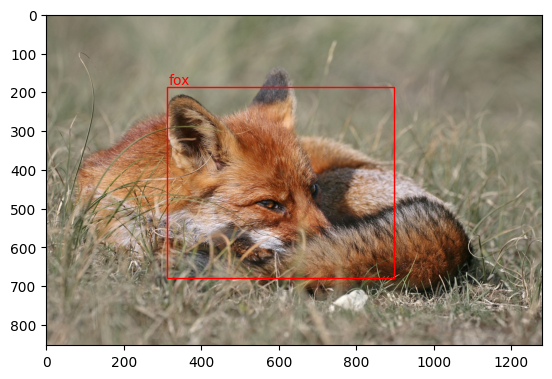

In [ ]:
skan('/content/drive/MyDrive/content/skan')